In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

#now to import everyhting from classes.py and functions.py
from classes import *
from functions import *

In [2]:
print(torch.cuda.is_available()) 
print(torch.cuda.current_device())  
print(torch.cuda.get_device_name(0))  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

True
0
NVIDIA GeForce RTX 4070 SUPER
Using device: cuda


In [ ]:
# Define Paths and Split Data
base_dir = '/Users/hunte/Desktop/PetImages'

dog_files,cat_files = gather_paths(base_dir)

train_files, train_labels, val_files, val_labels = create_train_val_split(dog_files, cat_files, val_size=0.2)

c:\Users\hunte\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [4]:
# Data Augmentation and Preprocessing
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), shear=0.2, scale=(0.7, 1.3)),
    transforms.ColorJitter(brightness=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Create Datasets and DataLoaders (see classes.py for PetDataset class)
train_dataset = PetDataset(train_files, train_labels, transform=train_transforms)
val_dataset = PetDataset(val_files, val_labels, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

In [ ]:
# Define CNN Model (see classes.py)
model = SmallerPetCNN().to(device)
print(model)

SmallerPetCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=65536, out_features=128, bias=True)
  (bn5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, ou

In [6]:
# Train the model
history = train_model(model, train_loader, val_loader,25, 'smaller')

Entering training loop...


Epoch 1/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.51it/s, loss=0.354, batch_acc=1]    


Epoch 1/25, Train Acc: 0.6477, Val Acc: 0.7184, Train Loss: 0.6277, Val Loss: 0.5505


Epoch 2/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.57it/s, loss=0.125, batch_acc=1]    


Epoch 2/25, Train Acc: 0.7237, Val Acc: 0.6778, Train Loss: 0.5437, Val Loss: 0.6601


Epoch 3/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.46it/s, loss=0.348, batch_acc=1]    


Epoch 3/25, Train Acc: 0.7623, Val Acc: 0.8130, Train Loss: 0.4895, Val Loss: 0.4116


Epoch 4/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.62it/s, loss=0.0548, batch_acc=1]    


Epoch 4/25, Train Acc: 0.7901, Val Acc: 0.7238, Train Loss: 0.4486, Val Loss: 0.5960


Epoch 5/25 [Val]: 100%|██████████| 157/157 [00:08<00:00, 17.92it/s, loss=0.567, batch_acc=0.75] 


Epoch 5/25, Train Acc: 0.8079, Val Acc: 0.8444, Train Loss: 0.4195, Val Loss: 0.3627


Epoch 6/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.29it/s, loss=0.537, batch_acc=0.75] 


Epoch 6/25, Train Acc: 0.8234, Val Acc: 0.8604, Train Loss: 0.3917, Val Loss: 0.3260


Epoch 7/25 [Val]: 100%|██████████| 157/157 [00:08<00:00, 18.30it/s, loss=0.093, batch_acc=1]     


Epoch 7/25, Train Acc: 0.8326, Val Acc: 0.8580, Train Loss: 0.3723, Val Loss: 0.3221


Epoch 8/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.40it/s, loss=0.49, batch_acc=0.75]  


Epoch 8/25, Train Acc: 0.8462, Val Acc: 0.8194, Train Loss: 0.3509, Val Loss: 0.4036


Epoch 9/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.44it/s, loss=0.148, batch_acc=1]    


Epoch 9/25, Train Acc: 0.8497, Val Acc: 0.8864, Train Loss: 0.3414, Val Loss: 0.2744


Epoch 10/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.51it/s, loss=0.205, batch_acc=0.875]


Epoch 10/25, Train Acc: 0.8568, Val Acc: 0.8954, Train Loss: 0.3304, Val Loss: 0.2472


Epoch 11/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.51it/s, loss=0.142, batch_acc=1]    


Epoch 11/25, Train Acc: 0.8651, Val Acc: 0.9080, Train Loss: 0.3190, Val Loss: 0.2282


Epoch 12/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.47it/s, loss=0.062, batch_acc=1]     


Epoch 12/25, Train Acc: 0.8696, Val Acc: 0.9054, Train Loss: 0.3046, Val Loss: 0.2367


Epoch 13/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.43it/s, loss=0.162, batch_acc=1]    


Epoch 13/25, Train Acc: 0.8717, Val Acc: 0.8912, Train Loss: 0.2974, Val Loss: 0.2553


Epoch 14/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.28it/s, loss=0.0156, batch_acc=1]    


Epoch 14/25, Train Acc: 0.8819, Val Acc: 0.8146, Train Loss: 0.2785, Val Loss: 0.4711


Epoch 15/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.59it/s, loss=0.0648, batch_acc=1]   


Epoch 15/25, Train Acc: 0.8808, Val Acc: 0.9016, Train Loss: 0.2798, Val Loss: 0.2426


Epoch 16/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.67it/s, loss=0.0507, batch_acc=1]    


Epoch 16/25, Train Acc: 0.8848, Val Acc: 0.9082, Train Loss: 0.2732, Val Loss: 0.2251


Epoch 17/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.53it/s, loss=0.195, batch_acc=0.875]


Epoch 17/25, Train Acc: 0.8919, Val Acc: 0.9118, Train Loss: 0.2580, Val Loss: 0.2187


Epoch 18/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.50it/s, loss=0.118, batch_acc=1]     


Epoch 18/25, Train Acc: 0.8914, Val Acc: 0.9290, Train Loss: 0.2560, Val Loss: 0.1870


Epoch 19/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.18it/s, loss=0.184, batch_acc=1]    


Epoch 19/25, Train Acc: 0.8949, Val Acc: 0.9262, Train Loss: 0.2528, Val Loss: 0.1902


Epoch 20/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.13it/s, loss=0.133, batch_acc=1]    


Epoch 20/25, Train Acc: 0.8967, Val Acc: 0.9254, Train Loss: 0.2453, Val Loss: 0.1870


Epoch 21/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.01it/s, loss=0.00592, batch_acc=1]   


Epoch 21/25, Train Acc: 0.8998, Val Acc: 0.8850, Train Loss: 0.2394, Val Loss: 0.2874


Epoch 22/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.09it/s, loss=0.0157, batch_acc=1]    


Epoch 22/25, Train Acc: 0.9038, Val Acc: 0.9118, Train Loss: 0.2294, Val Loss: 0.2097


Epoch 23/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.16it/s, loss=0.116, batch_acc=1]     


Epoch 23/25, Train Acc: 0.9022, Val Acc: 0.9376, Train Loss: 0.2320, Val Loss: 0.1579


Epoch 24/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 15.97it/s, loss=0.0291, batch_acc=1]    


Epoch 24/25, Train Acc: 0.9079, Val Acc: 0.9404, Train Loss: 0.2270, Val Loss: 0.1577


Epoch 25/25 [Val]: 100%|██████████| 157/157 [00:09<00:00, 16.13it/s, loss=0.0327, batch_acc=1]    

Epoch 25/25, Train Acc: 0.9064, Val Acc: 0.9350, Train Loss: 0.2227, Val Loss: 0.1725


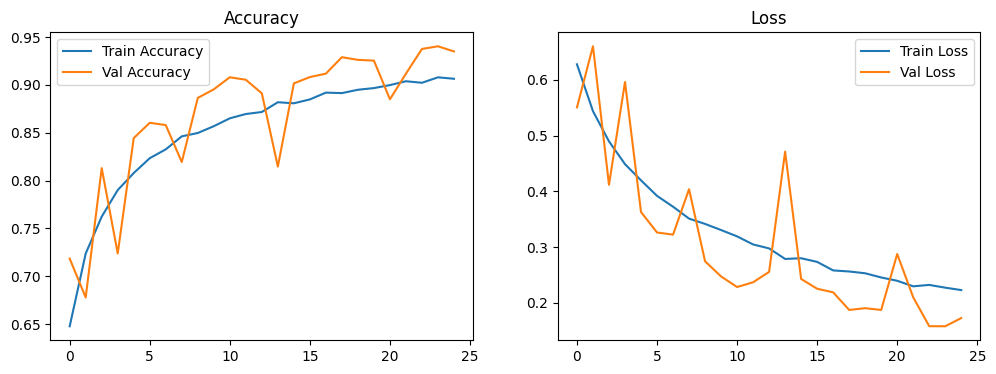

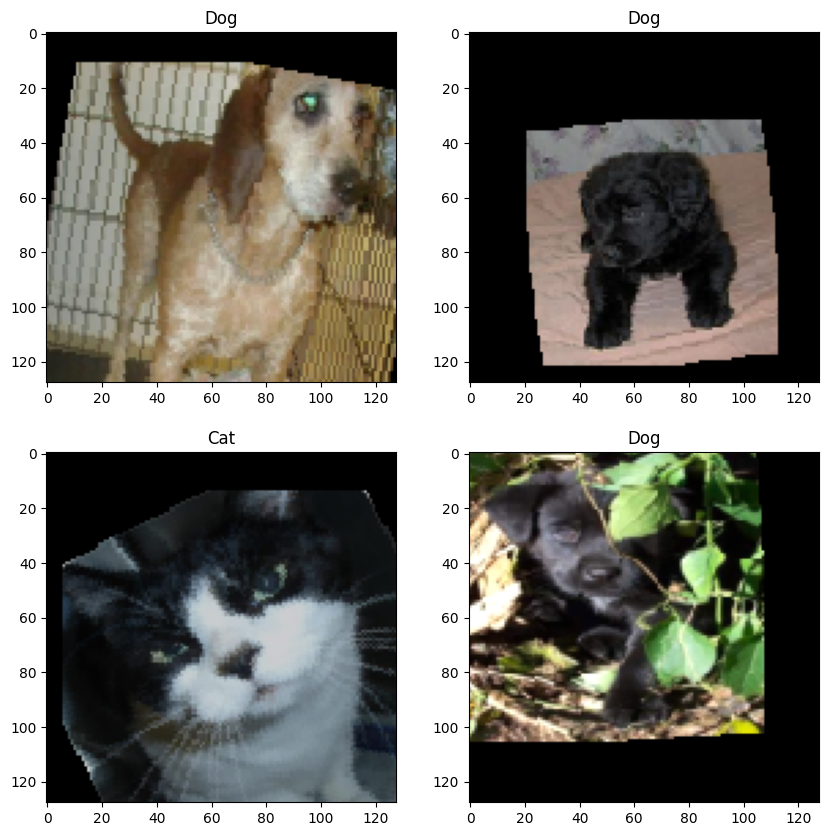

In [ ]:
#Visualize Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Visualize Augmented Images
model.eval()
dataiter = iter(train_loader)
images, labels = next(dataiter)
images, labels = images[:4].to(device), labels[:4].to(device)

plt.figure(figsize=(10, 10))
for i in range(4):
    img = images[i].cpu().numpy().transpose((1, 2, 0))  # Convert to HWC format
    img = img * 0.5 + 0.5  # Denormalize
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title('Cat' if labels[i].item() == 0 else 'Dog')
plt.show()